# 서울의 기온 데이터 분석

* https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70

* 기온분석>
    * 자료구분:일,
    * 자료형태:기본,
    * 기간: ~ 현재, 
    * 지역: 서울
* CSV 파일 형태로 다운

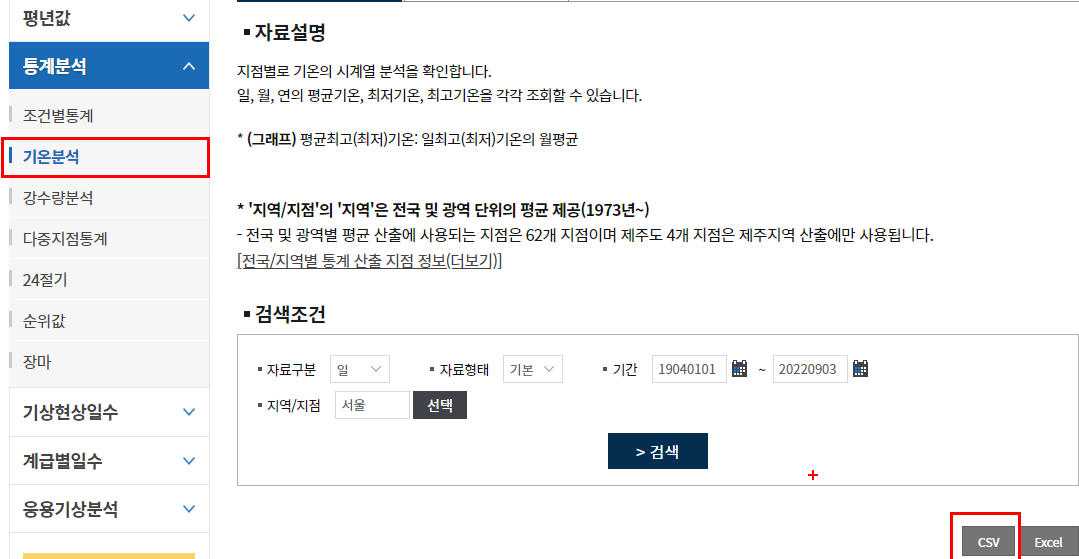

### 데이터에 대한 질문

* 서울이 가장 더웠던 날은 언제였을까? 얼마나 더웠을까?
* 일교차가 가장 큰 시기는 1년 중 언제쯤일까?
* 겨울에는 언제 가장 추울까? 12월? 1월? 2월?
* 가장 덥다고 알려진 대구보다 서울이 더 더운 날이 1년 중 얼마나 있을까?

## 라이브러리 로드

In [2]:
!pip install matplotlib

In [3]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# #코랩의 경우
# # 나눔고딕 폰트 인스톨
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

## 데이터 로드

In [5]:
# 데이터 로드, 인코딩, header,sep 등 필요한 파라미터 사용
df = pd.read_csv('./data/tae_20220920102716.csv', header=6, encoding='UTF-8')
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


## 데이터 살펴보기

In [6]:
df.info()
# 데이터수 : 41562건
# 컬럼수와 이름 : 5개
# 컬럼 타임 : 날짜->str, 기온->실수
# 결측치 유무 : 기온컬럼에 대해서는 결측치 존재 -> 어떻게 처리할지는 나중에 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41562 entries, 0 to 41561
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41562 non-null  object 
 1   지점       41562 non-null  int64  
 2   평균기온(℃)  40806 non-null  float64
 3   최저기온(℃)  40803 non-null  float64
 4   최고기온(℃)  40803 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe() # 숫자형 컬럼에만 국한

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,41562.0,40806.000000,40803.000000,40803.000000
mean,108.0,11.781135,7.490523,16.784746
std,0.0,10.662868,10.891121,10.980128
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.725000,-1.400000,7.300000
50%,108.0,13.000000,8.000000,18.600000
75%,108.0,21.200000,17.200000,26.300000
max,108.0,33.700000,30.300000,39.600000


## 결측 데이터 전처리

### 결측데이터수 파악하기

In [8]:
df.isnull().sum()

날짜           0
지점           0
평균기온(℃)    756
최저기온(℃)    759
최고기온(℃)    759
dtype: int64

### 평균기온, 최저기온, 최고 기온 결측치인 날짜 찾음

In [9]:
# 평균기온, 최저기온, 최고 기온의 결측치인 날짜 찾음
df[df['평균기온(℃)'].isnull()]
# 1950년 9월 1일 6.25전쟁으로 서울기상 관측안됨

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16427,1953-11-26,108,NaN,NaN,NaN
16428,1953-11-27,108,NaN,NaN,NaN
16429,1953-11-28,108,NaN,NaN,NaN
16430,1953-11-29,108,NaN,NaN,NaN


In [10]:
df[df['최저기온(℃)'].isnull()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


In [11]:
# 2017년에도 결측치 있네...
df[df['최고기온(℃)'].isnull()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


### 결측치 데이터 처리


In [12]:
# 평균기온은 0, 최저기온은 999, 최고기온은 -999로 채움

df['평균기온(℃)'] = df['평균기온(℃)'].fillna(0)
df['최저기온(℃)'] = df['최저기온(℃)'].fillna(999)
df['최고기온(℃)'] = df['최고기온(℃)'].fillna(-999)

In [13]:
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [14]:
#결측치였던 1950년대 데이터가 어떻게 바뀌었는지 확인
df.query('"1950-09-01" <= 날짜 <= "1950-09-30"')

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,0.0,999.0,-999.0
15677,1950-09-02,108,0.0,999.0,-999.0
15678,1950-09-03,108,0.0,999.0,-999.0
15679,1950-09-04,108,0.0,999.0,-999.0
15680,1950-09-05,108,0.0,999.0,-999.0
15681,1950-09-06,108,0.0,999.0,-999.0
15682,1950-09-07,108,0.0,999.0,-999.0
15683,1950-09-08,108,0.0,999.0,-999.0
15684,1950-09-09,108,0.0,999.0,-999.0
15685,1950-09-10,108,0.0,999.0,-999.0


## 컬럼명 바꾸기

In [15]:
df.columns=['날짜', '지점', '평균', '최저', '최고']
df.head()

,날짜,지점,평균,최저,최고
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


## 서울에서 가장 더웠던 날은?

In [16]:
#최고 더운 날은?
df.sort_values(by='최고', ascending=False)

,날짜,지점,평균,최저,최고
40051,2018-08-01,108,33.6,27.8,39.6
31277,1994-07-24,108,33.1,28.1,38.4
40050,2018-07-31,108,32.6,27.8,38.3
13111,1943-08-24,108,29.0,23.2,38.2
31276,1994-07-23,108,32.6,28.0,38.2
...,...,...,...,...,...
16069,1952-12-03,108,0.0,999.0,-999.0
15869,1952-04-16,108,0.0,999.0,-999.0
15909,1952-05-26,108,0.0,999.0,-999.0
16070,1952-12-04,108,0.0,999.0,-999.0


In [17]:
# 서울에서 가장 더웠던 날은? 2018-08-01: 39.6도 출력
day, high=df.iloc[40051,[0,4]]
print(f'서울에서 가장 더웠던 날은? {day}: {high}도')

서울에서 가장 더웠던 날은? 2018-08-01: 39.6도


# 내 생일날 기온변화 그래프 그리기

## 내 생일날 기온변화 그래프 그리기(평균기온 기준)
* 데이터 로딩
* 결측 데이터 전처리
* 내 생일 데이터만 추출
* 필요한 컬럼만 추출 or 불필요한 데이터 삭제
* 그래프 그리기

In [18]:
#라이브러리 임포트
import pandas as pd
import numbers as np
import matplotlib.pyplot as plt

# 데이터 로딩
df=pd.read_csv('./data/tae_20220920102716.csv', header=6)
df.head()

# 결측치 처리
df['평균기온(℃)'] = df['평균기온(℃)'].fillna(0)
df['최저기온(℃)'] = df['최저기온(℃)'].fillna(999)
df['최고기온(℃)'] = df['최고기온(℃)'].fillna(-999)

# 데이터 전처리(컬럼명 수정)
df.columns=['날짜', '지점', '평균', '최저', '최고']
df.head()

,날짜,지점,평균,최저,최고
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


## 내 생일 데이터만 추출

In [19]:
# 어떤 컬럼을 기준으로 내생일 기온그래프를 그릴껀지 고민
# 내 생일 데이터만 추출
df['날짜'].str.contains('06-14')


0        False
1        False
2        False
3        False
4        False
         ...  
41557    False
41558    False
41559    False
41560    False
41561    False
Name: 날짜, Length: 41562, dtype: bool

In [20]:
birth_df = df[df['날짜'].str.contains('03-05')]

## 필요한 컬럼만 추출

In [21]:
# 필요한 컬럼만 추출
birth_df=birth_df[['날짜','평균']]
birth_df.head()

,날짜,평균
257,1908-06-14,21.2
622,1909-06-14,19.6
987,1910-06-14,20.2
1352,1911-06-14,22.5
1718,1912-06-14,23.2


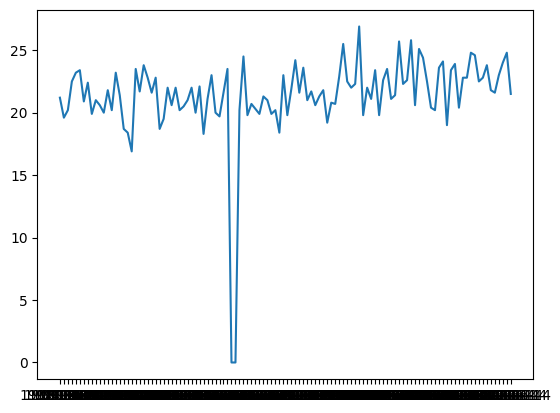

In [23]:
# 내 생일 데이터 그래프 그리기
plt.plot(birth_df['날짜'],birth_df['평균'])

In [24]:
birth_df['평균'] < 5

257      False
622      False
987      False
1352     False
1718     False
         ...  
40003    False
40368    False
40734    False
41099    False
41464    False
Name: 평균, Length: 114, dtype: bool

In [26]:
birth_df[birth_df['평균'] < 5]

,날짜,평균
15928,1952-06-14,0.0
16262,1953-06-14,0.0


## 결측 데이터 재 처리

> * 평균 기온이 0인 데이터 어떻게 처리 할 것인가?
> * 결측치를 삭제하는 것으로 처리

In [129]:
#라이브러리 임포트
import pandas as pd
import numbers as np
import matplotlib.pyplot as plt

# 데이터 로딩
df=pd.read_csv('./data/tae_20220920102716.csv', header=6)
df.head()

# 데이터 전처리(컬럼명 수정)
df.columns=['날짜', '지점', '평균', '최저', '최고']
df.head()


,날짜,지점,평균,최저,최고
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [28]:
# 결측 데이터 삭제
df.dropna(inplace=True)

In [30]:
df.isnull().sum()

날짜    0
지점    0
평균    0
최저    0
최고    0
dtype: int64

## 내가 태어난 이 후의 데이터만 추출해서 살펴보기

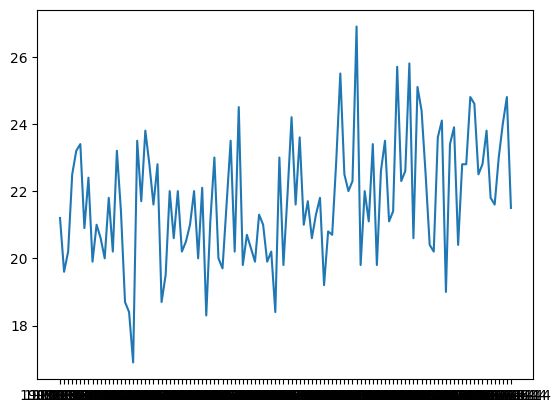

In [47]:
birth_df = df[df['날짜'].str.contains('06-14')]
birth_df = birth_df[['날짜','평균']]
plt.plot(birth_df['날짜'],birth_df['평균'])

In [48]:
# 내 생일이면서, 1980년 이후의 데이터만 추출
birth_df=birth_df.query('"1980-01-01" <= 날짜')

In [49]:
# 필요한 컬럼만 추출
birth_df.head()

,날짜,평균
26124,1980-06-14,25.5
26489,1981-06-14,22.5
26854,1982-06-14,22.0
27219,1983-06-14,22.3
27585,1984-06-14,26.9


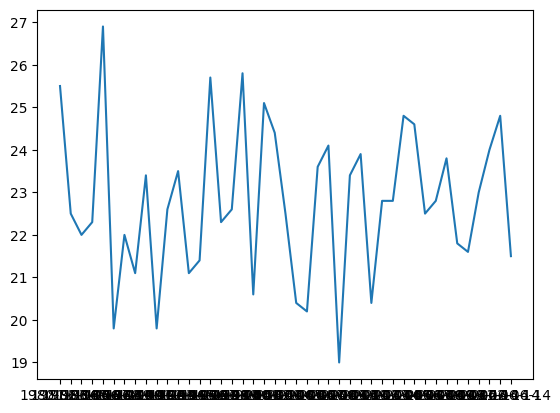

In [50]:
# 내 생일 데이터 그래프 그리기
plt.plot(birth_df['날짜'],birth_df['평균'])

## 내가 태어난 날 -> 날짜 형식으로 변환하고 데이터 추출하고 보기

### 날짜 컬럼 Dtype 확인

In [51]:
# 날짜 컬럼 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40802 entries, 0 to 41561
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      40802 non-null  object 
 1   지점      40802 non-null  int64  
 2   평균      40802 non-null  float64
 3   최저      40802 non-null  float64
 4   최고      40802 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.9+ MB


### object -> datetime64[ns] 형변환

In [67]:
# 날짜 데이터 Str => date 형으로 변환
df['날짜'] = df['날짜'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40802 entries, 0 to 41561
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      40802 non-null  datetime64[ns]
 1   지점      40802 non-null  int64         
 2   평균      40802 non-null  float64       
 3   최저      40802 non-null  float64       
 4   최고      40802 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 2.9 MB


In [70]:
# df.head()
df['날짜'].dt.year

0        1907
1        1907
2        1907
3        1907
4        1907
         ... 
41557    2022
41558    2022
41559    2022
41560    2022
41561    2022
Name: 날짜, Length: 40802, dtype: int64

In [71]:
df['년'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day

In [72]:
df.head()

,날짜,지점,평균,최저,최고,년,월,일
0,1907-10-01,108,13.5,7.9,20.7,1907,10,1
1,1907-10-02,108,16.2,7.9,22.0,1907,10,2
2,1907-10-03,108,16.2,13.1,21.3,1907,10,3
3,1907-10-04,108,16.5,11.2,22.0,1907,10,4
4,1907-10-05,108,17.6,10.9,25.4,1907,10,5


### 내 생일이면서 1980년 이후의 데이터만 추출

In [126]:
# 내 생일이면서, 1980년 이후의 데이터만 추출
birth_df=df[['날짜','평균','년','월','일']]
birth_df=birth_df[
(birth_df['년'] >= 1980 )&
(birth_df['월'] == 6)&
(birth_df['일'] == 4)
]
birth_df.head()


,날짜,평균,년,월,일
26114,1980-06-04,20.1,1980,6,4
26479,1981-06-04,19.3,1981,6,4
26844,1982-06-04,20.2,1982,6,4
27209,1983-06-04,23.3,1983,6,4
27575,1984-06-04,23.7,1984,6,4


In [119]:
# 필요한 컬럼만 추출
birth_df[['평균','년']].head()

,평균,년
26114,20.1,1980
26479,19.3,1981
26844,20.2,1982
27209,23.3,1983
27575,23.7,1984


## 그래프 그리기

Text(0, 0.5, 'average temperature (℃)')

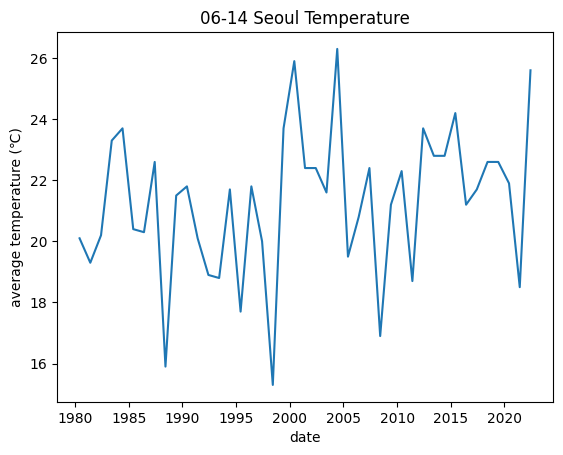

In [127]:
# 내 생일 데이터 그래프 그리기
plt.plot(birth_df['날짜'],birth_df['평균'])
plt.title('06-14 Seoul Temperature')
plt.xlabel('date')
plt.ylabel('average temperature (℃)')

In [ ]:
# X축에 날짜가 나오도록해서 다시 출력


# 매년 크리스마스의 최고 기온과 최저 기온의 추이를 그려보자. 

# 같은 데이타, 다른 그래프, 새로운 분석
* 서울 최고 기온 데이터 전체를 나타낸 lineplot을 보고 어떤 정보를 얻었나요?

##  line:서울 최고 기온 그래프

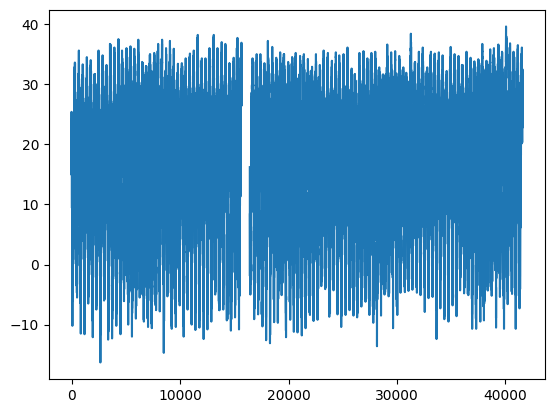

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/tae_20220920102716.csv',header=6)
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

# plt.plot(df['최고기온'])
# plt.show()

> * 최고 기온 데이터 전체를 그래프로 나타냈는데, 결측치 존재 말고는 특별한 정보를 얻을 수 없습니다. 
> * 다른 관점으로 데이터를 바라보기 위해서
> * 다른 종류의 시각화를 시도해 봅시다. 

## hist:기온 데이터를 히스토그램으로 표현하기

* 특정구간의 자료의 수를 표현할때

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/tae_20220920102716.csv',header=6)
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)



(array([  35.,  596., 2812., 5465., 5275., 4915., 6248., 9004., 5915.,
         538.]),
 array([-16.3 , -10.71,  -5.12,   0.47,   6.06,  11.65,  17.24,  22.83,
         28.42,  34.01,  39.6 ]),
 <BarContainer object of 10 artists>)

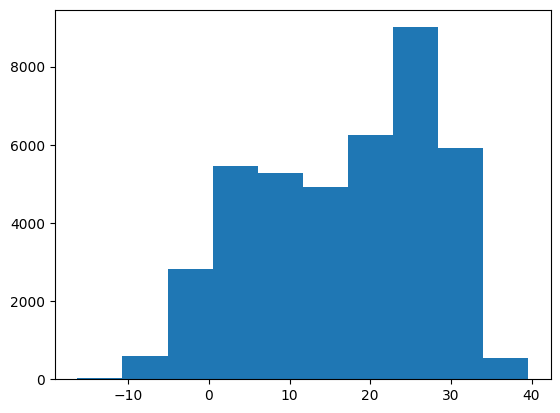

In [139]:
plt.hist(df['최고기온'])

<AxesSubplot: >

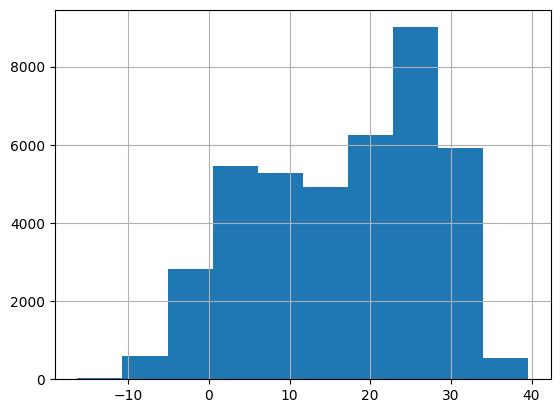

In [140]:
# pandas 내부의 매플랏립 라이브러리와 연동 

df['최고기온'].hist()

<AxesSubplot: >

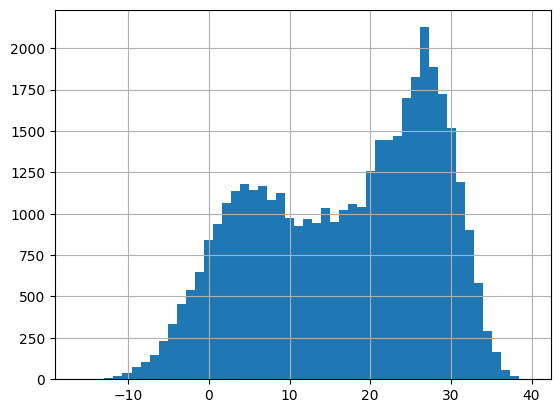

In [150]:
df['최고기온'].hist(bins=50)

## hist:겨울과 여름 계절의 패턴인가? 그럼 8월만 데이터를 뽑아보자.
* 역대 8월의 최고 온도는?
* 최고 기온의 분포(최저 ~ 최고)는?

In [176]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [179]:
# 결측치 삭제
df.dropna(inplace=True)

# 날짜 타임으로 변환
df['날짜']=df['날짜'].astype('datetime64')


In [182]:
# 8월만 데이터 추출
df[df['날짜'].dt.month == 8]

,날짜,지점,평균기온,최저기온,최고기온
305,1908-08-01,108,26.2,24.4,29.6
306,1908-08-02,108,26.4,23.3,30.7
307,1908-08-03,108,26.9,24.2,32.0
308,1908-08-04,108,26.3,22.6,31.5
309,1908-08-05,108,27.3,23.6,32.4
...,...,...,...,...,...
41538,2022-08-27,108,21.5,17.6,25.5
41539,2022-08-28,108,22.6,16.1,28.4
41540,2022-08-29,108,21.0,19.5,22.5
41541,2022-08-30,108,19.1,17.9,20.3


In [192]:
aug_df = df[df['날짜'].dt.month == 8]

jan_df = df[df['날짜'].dt.month == 1]

In [193]:
aug_df.head()
jan_df.head()

,날짜,지점,평균기온,최저기온,최고기온
92,1908-01-01,108,-5.9,-9.1,-1.3
93,1908-01-02,108,-7.7,-13.9,-3.0
94,1908-01-03,108,-6.2,-10.8,-2.9
95,1908-01-04,108,-7.5,-12.8,-1.7
96,1908-01-05,108,-4.8,-11.3,-0.1


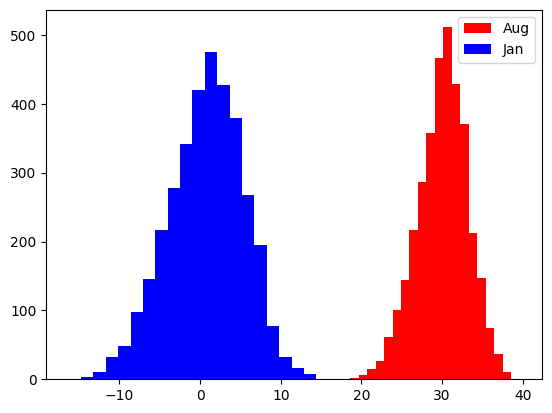

In [201]:
# hist(데이터,몇개구간,색깔)

plt.hist(aug_df['최고기온'], bins=20, color='r' , label='Aug')
plt.hist(jan_df['최고기온'], bins=20, color='b' , label='Jan')
plt.legend() # 범례표시
plt.show()

## hist:1월과 8월의 데이터를 히스토그램으로 시각화하기


In [154]:

# 8월 데이터만 추출


# 1월 데이터만 추출


<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
41557    False
41558    False
41559    False
41560    False
41561    False
Name: 최고기온, Length: 41562, dtype: bool>

> * 같은 데이터에서 어떤 내용을 추출하여, 어떤 방법으로 시각화하는냐에 따라 새로운 정보를 발견할 수 있습니다. 
> * 1,8월 이외에 궁금한 달이 있다면 도전!

## box:기온 데이터 대략적인 통계정보 확인하기

In [204]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/tae_20220920102716.csv',header=6)
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)


# 결측 데이터 삭제
df.dropna(inplace=True)


<function matplotlib.pyplot.show(close=None, block=None)>

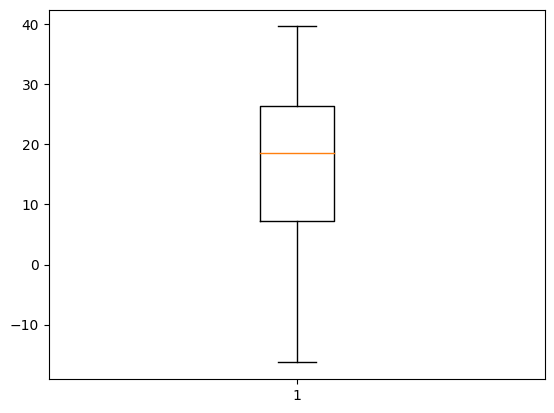

In [206]:
plt.boxplot(df['최고기온'])
plt.show

In [207]:
df['최고기온'].describe()

count    40802.000000
mean        16.784462
std         10.980112
min        -16.300000
25%          7.300000
50%         18.600000
75%         26.300000
max         39.600000
Name: 최고기온, dtype: float64

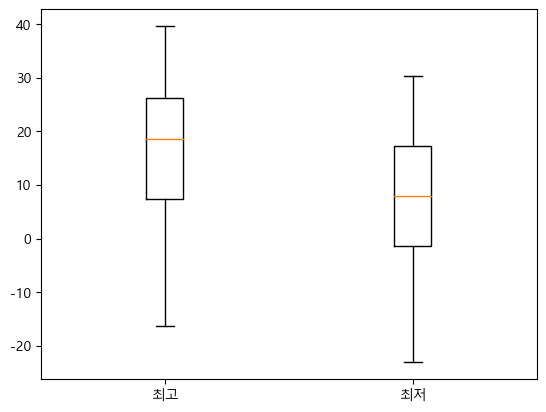

In [215]:
plt.boxplot([   df['최고기온'], df['최저기온']  ], labels=['최고', '최저'])

plt.rc('font',family='Malgun Gothic')#맑은 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus']=False  #마이너스 기호 깨짐 방지
plt.show()

## 월별 기온 데이터

1. 데이터를 월별로 조회하고, 결과를 리스트에 담는다.
2. 월별 데이터를 box plot으로 그래프 그린다. 

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/tae_20220920102716.csv',header=6)
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

# 결측 데이터 삭제
df.dropna(inplace=True)
# 날짜 데이터 Str => date 형으로 변환
df['날짜'] = df['날짜'].astype('datetime64')

In [297]:
month_list=[]
for n in range(1,13):
    month_list.append(df[df['날짜'].dt.month == n])

,날짜,지점,평균기온,최저기온,최고기온
61,1907-12-01,108,-4.6,-10.5,1.4
62,1907-12-02,108,-3.1,-9.0,3.4
63,1907-12-03,108,1.9,-2.6,6.1
64,1907-12-04,108,-1.2,-2.7,1.3
65,1907-12-05,108,-1.0,-6.9,2.6
...,...,...,...,...,...
41295,2021-12-27,108,-7.6,-12.9,-3.9
41296,2021-12-28,108,-4.1,-8.5,-0.9
41297,2021-12-29,108,0.4,-3.8,5.9
41298,2021-12-30,108,-3.9,-6.8,0.2


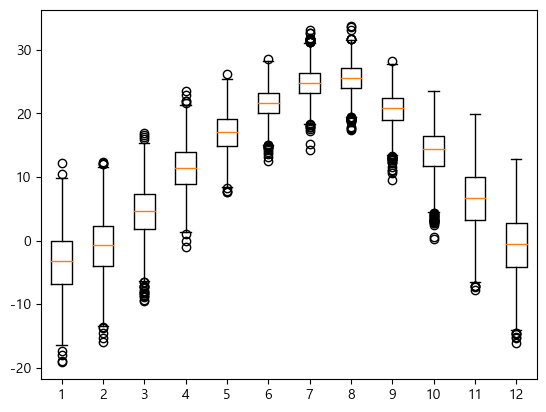

In [298]:
plt.boxplot([
    month_list[0]['평균기온'],
    month_list[1]['평균기온'],
    month_list[2]['평균기온'],
    month_list[3]['평균기온'],
    month_list[4]['평균기온'],
    month_list[5]['평균기온'],
    month_list[6]['평균기온'],
    month_list[7]['평균기온'],
    month_list[8]['평균기온'],
    month_list[9]['평균기온'],
    month_list[10]['평균기온'],
    month_list[11]['평균기온']
    ])
plt.show()